<a href="https://colab.research.google.com/github/TonyChen91/KerasTensorflow/blob/main/keras_cifar10_lv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

(x_train_image, y_train_label),(x_test_image, y_test_label)=cifar10.load_data()
# import os
# cache_dir = os.path.expanduser('~/.keras/datasets/')
# print(cache_dir)
print("下載到的訓練資料有", len(x_train_image), len(y_train_label))
print("測試資料有" ,len(x_test_image), len(y_test_label))
print("x_train_image:",x_train_image.shape) # 四維的3代表RBG彩色
print("y_train_label:",y_train_label.shape)
print("x_test_image:",x_test_image.shape)
print("y_test_label:",y_test_label.shape)
# print(x_train_image[0])

170498071/170498071 [==============================] - 2s 0us/step
下載到的訓練資料有 50000 50000
測試資料有 10000 10000
x_train_image: (50000, 32, 32, 3)
y_train_label: (50000, 1)
x_test_image: (10000, 32, 32, 3)
y_test_label: (10000, 1)


In [4]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

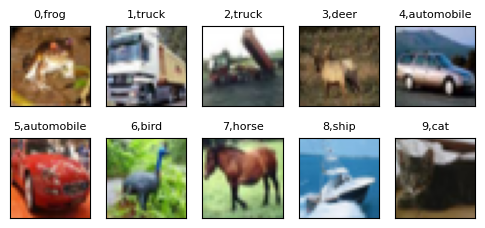

In [5]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
  fig=plt.gcf()
  fig.set_size_inches(6,7)#整個大圖的尺寸
  if num>25: #num=畫幾個小圖最多12
    num=12
  for i in range(0, num):
    ax=plt.subplot(5,5,1+i) #子圖形五行五列 第幾個 如果寫num-i會倒過來
    ax.imshow(images[idx],cmap="binary")
    title=str(i)+","+label_dict[int(labels[i])]
    if len(prediction)>0: #如果有預測值放上去顯示
      title+="=>"+label_dict[prediction[i]]
    ax.set_title(title,fontsize=8)
    ax.set_xticks([]) #不顯示刻度
    ax.set_yticks([])
    idx+=1
  plt.show()
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

In [6]:
#資料預處理 讓xy兩者變成可用的矩陣
# x_train_image[0][0][0]
x_train_image_normalize=x_train_image.astype("float32")/255.0
x_test_image_normalize=x_test_image.astype("float32")/255.0
# x_train_image_normalize[0][0][0]

# y_train_label
from keras.utils import np_utils
y_train_label_onehot=np_utils.to_categorical(y_train_label)
y_test_label_onehot=np_utils.to_categorical(y_test_label)
# y_train_label_onehot.shape

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,ZeroPadding2D
model=Sequential() #建立一個線性堆疊模型
#卷基層1池化層1
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",input_shape=(32,32,3),activation="relu"))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",input_shape=(32,32,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#卷基層2池化層2
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#卷基層3池化層3
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(units=2500,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=1500,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=10,activation="softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

In [17]:
from google.colab import drive
drive.mount('/content/drive') # 连接到Google Drive

import pickle
try:
  model.load_weights("/content/drive/My Drive/Colab Notebooks/My_models/keras_cifar_model_lv2.h5")
  print("載入模型成功!繼續訓練")
except:
  print("[X]載入模型失敗!重新訓練")
try:
  with open("/content/drive/My Drive/Colab Notebooks/My_models/keras_cifar10_train_history_lv2.pkl", "rb") as file:
    loaded_train_history = pickle.load(file)
  print("歷史紀錄載入成功!")
except:
  print("[X]載入歷史紀錄失敗")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
載入模型成功!繼續訓練
歷史紀錄載入成功!


In [11]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"]) #定義此模型的訓練方式

In [16]:
train_history=model.fit(x=x_train_image_normalize,y=y_train_label_onehot,validation_split=0.2,epochs=7,batch_size=128,verbose=1)#訓練verbose 1一直跳2不會跳

model.save_weights("/content/drive/My Drive/Colab Notebooks/My_models/keras_cifar_model_lv2.h5") # 将文件保存到Google Drive中
print("模型:已存檔")
for key in train_history.history:
  loaded_train_history[key].extend(train_history.history[key]) # .history屬性即可
with open("/content/drive/My Drive/Colab Notebooks/My_models/keras_cifar10_train_history_lv2.pkl", "wb") as file:
  pickle.dump(loaded_train_history, file) #把load_train_history存下來
print("歷史紀錄:已存檔")
# loaded_train_history

Epoch 1/7
313/313 [==============================] - 521s 2s/step - loss: 0.5662 - accuracy: 0.7995 - val_loss: 0.6717 - val_accuracy: 0.7747
Epoch 2/7
313/313 [==============================] - 511s 2s/step - loss: 0.5417 - accuracy: 0.8082 - val_loss: 0.6768 - val_accuracy: 0.7690
Epoch 3/7
313/313 [==============================] - 502s 2s/step - loss: 0.5196 - accuracy: 0.8152 - val_loss: 0.6618 - val_accuracy: 0.7786
Epoch 4/7
313/313 [==============================] - 516s 2s/step - loss: 0.4947 - accuracy: 0.8253 - val_loss: 0.6465 - val_accuracy: 0.7868
Epoch 5/7
313/313 [==============================] - 506s 2s/step - loss: 0.4736 - accuracy: 0.8324 - val_loss: 0.6302 - val_accuracy: 0.7917
Epoch 6/7
313/313 [==============================] - 501s 2s/step - loss: 0.4570 - accuracy: 0.8375 - val_loss: 0.6577 - val_accuracy: 0.7773
Epoch 7/7
313/313 [==============================] - 520s 2s/step - loss: 0.4364 - accuracy: 0.8432 - val_loss: 0.6505 - val_accuracy: 0.7869
模型:已存檔

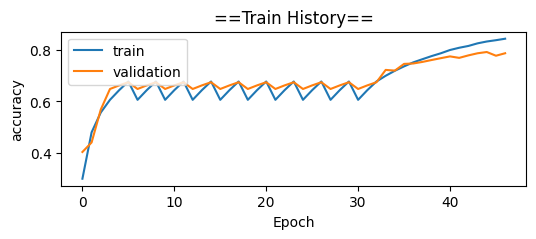

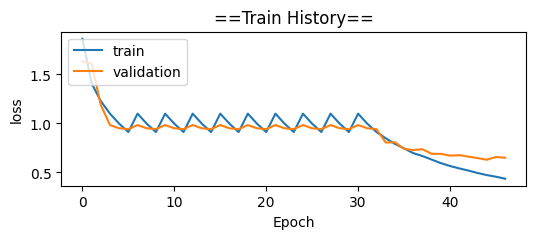

In [18]:
import matplotlib.pyplot as plt
def show_train_history(history,train,validation):
  plt.figure(figsize=(6,2))
  plt.plot(history[train]) #keras物件的.history屬性
  plt.plot(history[validation])
  plt.title("==Train History==")
  plt.ylabel(train)
  plt.xlabel("Epoch")
  plt.legend(["train","validation"],loc="upper left")
  plt.show()
# show_train_history(train_history.history,"accuracy","val_accuracy")
# show_train_history(train_history.history,"loss","val_loss")
show_train_history(loaded_train_history,"accuracy","val_accuracy")
show_train_history(loaded_train_history,"loss","val_loss")

In [19]:
scores=model.evaluate(x_test_image_normalize,y_test_label_onehot) #快速評估模型對test_data的預測能力
print(scores)

313/313 [==============================] - 30s 96ms/step - loss: 0.6655 - accuracy: 0.7813
[0.6655044555664062, 0.7813000082969666]


313/313 [==============================] - 31s 100ms/step
[2.67293828e-04 1.02558974e-04 1.14915834e-04 8.17907095e-01
 6.27171190e-04 1.79579213e-01 3.20408057e-04 1.30897752e-04
 3.49560214e-05 9.15337005e-04]
[3 8 8 0 6 6 1 6 3 1]


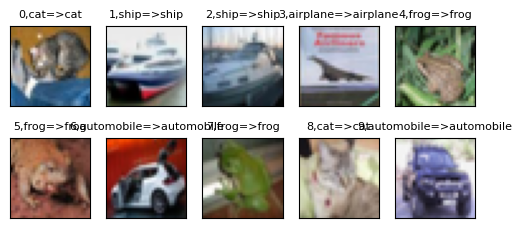

In [20]:
prediction=model.predict(x_test_image_normalize) #預測給x值會返回包含预测概率的数组
print(prediction[0])
predicted_classes = np.argmax(prediction, axis=1) #每个预测概率数组中找到最大值的index
print(predicted_classes[0:10]) #0~10十個預測值
plot_images_labels_prediction(x_test_image,y_test_label,predicted_classes,idx=0)

label: airplane =>predict airplane


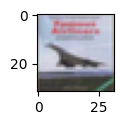

airplane 預測機率為:0.96191776
automobile 預測機率為:0.004515692
bird 預測機率為:0.0009625651
cat 預測機率為:0.0001285392
deer 預測機率為:0.0010375275
dog 預測機率為:5.448881e-06
frog 預測機率為:4.671007e-06
horse 預測機率為:6.0612415e-06
ship 預測機率為:0.02804236
truck 預測機率為:0.0033794113


In [21]:
def show_predicted_probability(y,predicted_classes,x,prediction,i):
  print("label:",label_dict[y[i][0]],"=>predict",label_dict[predicted_classes[i]])
  plt.figure(figsize=(1,1))
  plt.imshow(np.reshape(x[i],(32,32,3)))
  plt.show()
  for j in range(10):
    print(label_dict[j]+" 預測機率為:"+str(prediction[i][j]))
show_predicted_probability(y_test_label,predicted_classes,x_test_image,prediction,3)

In [22]:
# print(y_test_label) #y_test_label是二維的: [[],[],[],[]....]
# print(y_test_label_onehot) #y_test_label_onehot也是二維: [[,,,,,,],[,,,,,],[,,,,,],[,,,,]]
print(y_test_label.reshape(-1)) #可將y_test_label暫時換成一維的
print(label_dict)
import pandas as pd
pd.crosstab(y_test_label.reshape(-1),predicted_classes,rownames=["label"],colnames=["predict"]) #第一個參數是label,第二個是預測

[3 8 8 ... 5 1 7]
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,736,23,75,29,23,6,7,6,66,29
1,4,927,4,10,2,3,5,1,14,30
2,41,3,715,48,79,29,50,24,9,2
3,9,8,60,656,49,112,60,30,7,9
4,4,2,57,60,755,22,43,53,4,0
5,4,1,32,211,37,657,25,29,3,1
6,0,4,34,45,22,18,867,5,2,3
7,9,3,30,52,43,35,6,819,1,2
8,30,28,16,27,8,1,11,7,857,15
